In [4]:
import pandas as pd
from datasets import load_dataset

In [6]:
# Upload the dataset using Hugging Face datasets
try:
    dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
    print("Dataset loaded successfully from Hugging Face!")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    exit()

Dataset loaded successfully from Hugging Face!


In [7]:
# Convert the dataset to a pandas DataFrame
df = dataset['full'].to_pandas()  # Access the 'full' split and convert
print(f"Dataset converted to Pandas DataFrame with shape: {df.shape}")

Dataset converted to Pandas DataFrame with shape: (701528, 10)


# General information of the dataset

In [9]:
print("\n--- Dataset Information ---")
print(f"Number of reviews: {len(df)}")


--- Dataset Information ---
Number of reviews: 701528


In [11]:
if 'parent_asin' in df.columns:
    num_products = df['parent_asin'].nunique()
    print(f"Number of unique products (parent_asin): {num_products}")
else:
    print("The 'parent_asin' column was not found. Please check the dataset for the product identifier.")

print("\n--- List of Attributes (Columns) ---")
print(df.columns.tolist())

Number of unique products (parent_asin): 112565

--- List of Attributes (Columns) ---
['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']


# Numerical Features Analysis

In [16]:
# 1. Analyze 'rating'
print("\n--- Analysis of 'rating' ---")
print(df['rating'].describe().to_markdown(numalign="left", stralign="left")) # .to_markdown() for better formatting


--- Analysis of 'rating' ---
|       | rating   |
|:------|:---------|
| count | 701528   |
| mean  | 3.96025  |
| std   | 1.49445  |
| min   | 1        |
| 25%   | 3        |
| 50%   | 5        |
| 75%   | 5        |
| max   | 5        |


In [18]:
# 2. Analyze 'helpful_vote'
print("\n--- Analysis of 'helpful_vote' ---")
print(df['helpful_vote'].describe().to_markdown(numalign="left", stralign="left"))


--- Analysis of 'helpful_vote' ---
|       | helpful_vote   |
|:------|:---------------|
| count | 701528         |
| mean  | 0.923588       |
| std   | 5.47139        |
| min   | 0              |
| 25%   | 0              |
| 50%   | 0              |
| 75%   | 1              |
| max   | 646            |


In [20]:
# 3. Analyze 'number of reviews per product'
# Group by 'parent_asin' and count the number of reviews
reviews_per_product = df.groupby('parent_asin').size()

print("\n--- Analysis of 'Number of Reviews per Product' ---")
print(reviews_per_product.describe().to_markdown(numalign="left", stralign="left"))


--- Analysis of 'Number of Reviews per Product' ---
|       | 0       |
|:------|:--------|
| count | 112565  |
| mean  | 6.2322  |
| std   | 25.1898 |
| min   | 1       |
| 25%   | 1       |
| 50%   | 2       |
| 75%   | 4       |
| max   | 1962    |


# Visualizations

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

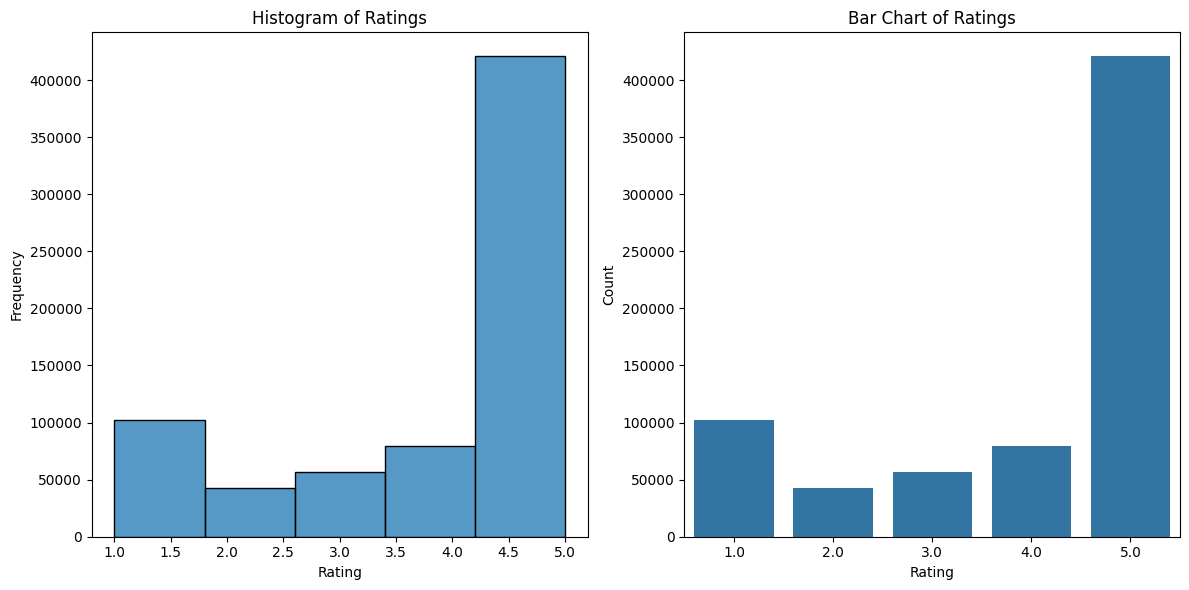

In [24]:
# 1. Visualize 'rating'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['rating'], bins=5, kde=False)  # Bins set to 5 since stars are 1-5
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x='rating', data=df)
plt.title('Bar Chart of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('rating_distribution_plots.png', dpi=300)
plt.show()

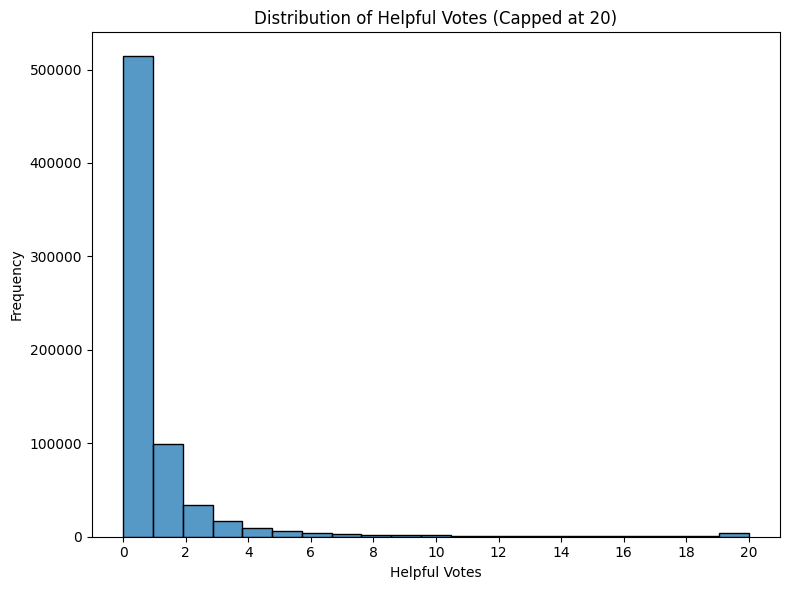

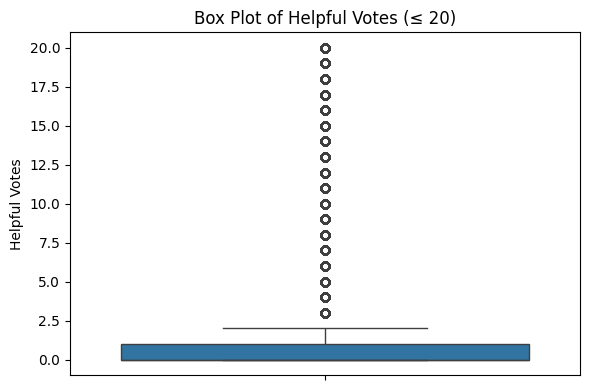

In [27]:
# --- 1. Histogram (Capped at 20 helpful votes) ---
plt.figure(figsize=(8, 6))
# Cap values at 20 to reduce skew caused by extreme outliers
capped_votes = df['helpful_vote'].apply(lambda x: x if x <= 20 else 20)
sns.histplot(capped_votes, bins=21, kde=False)
plt.title('Distribution of Helpful Votes (Capped at 20)')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.xticks(range(0, 21, 2))
plt.tight_layout()
plt.savefig('distribution_helpful_votes_capped.png', dpi=300)
plt.show()

# --- 2. Box Plot (Zoomed-in view for helpful_votes <= 20) ---
plt.figure(figsize=(6, 4))
sns.boxplot(y=df[df['helpful_vote'] <= 20]['helpful_vote'])
plt.title('Box Plot of Helpful Votes (≤ 20)')
plt.ylabel('Helpful Votes')
plt.tight_layout()
plt.savefig('boxplot_helpful_votes_capped.png', dpi=300)
plt.show()

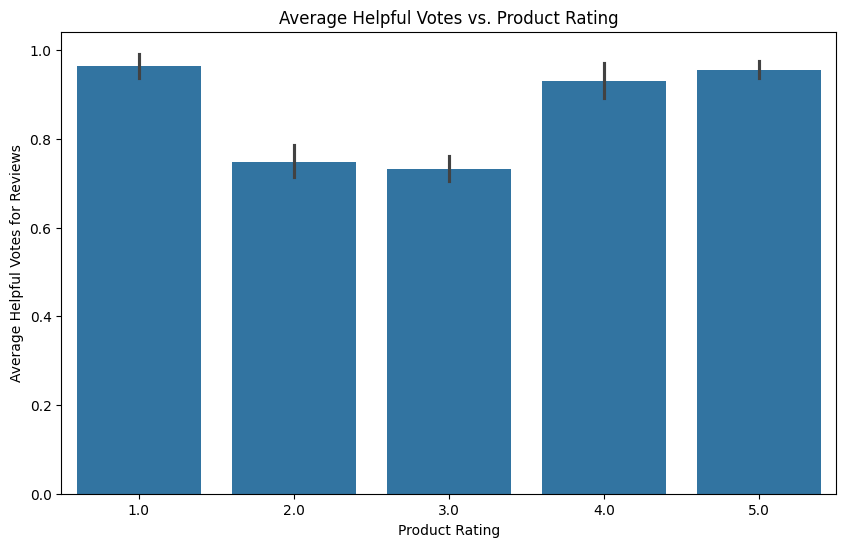

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='helpful_vote', data=df)
plt.title('Average Helpful Votes vs. Product Rating')
plt.xlabel('Product Rating')
plt.ylabel('Average Helpful Votes for Reviews')
plt.savefig('average_helpful_votes_vs_rating.png', dpi=300)
plt.show()

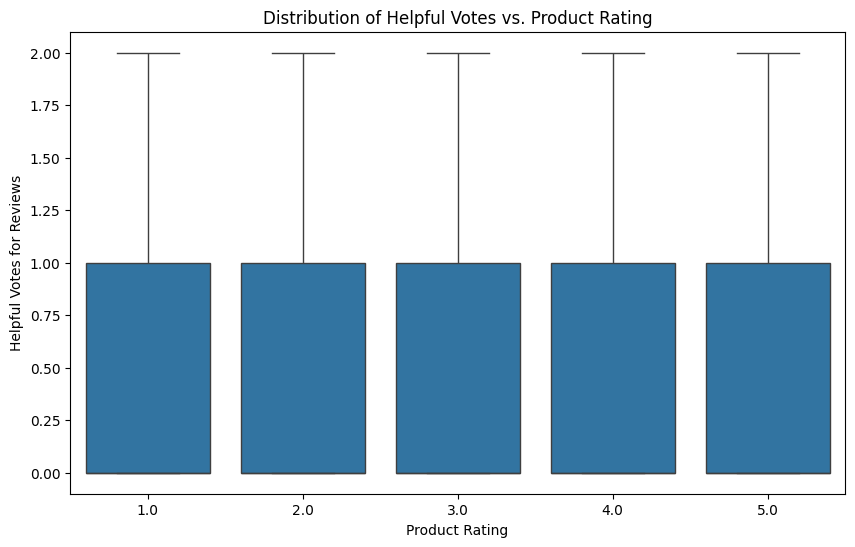

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='helpful_vote', data=df, showfliers=False)
plt.title('Distribution of Helpful Votes vs. Product Rating')
plt.xlabel('Product Rating')
plt.ylabel('Helpful Votes for Reviews')
plt.savefig('Distribution_of_Helpful_Votes_vs_Product_Rating', dpi=300)
plt.show()

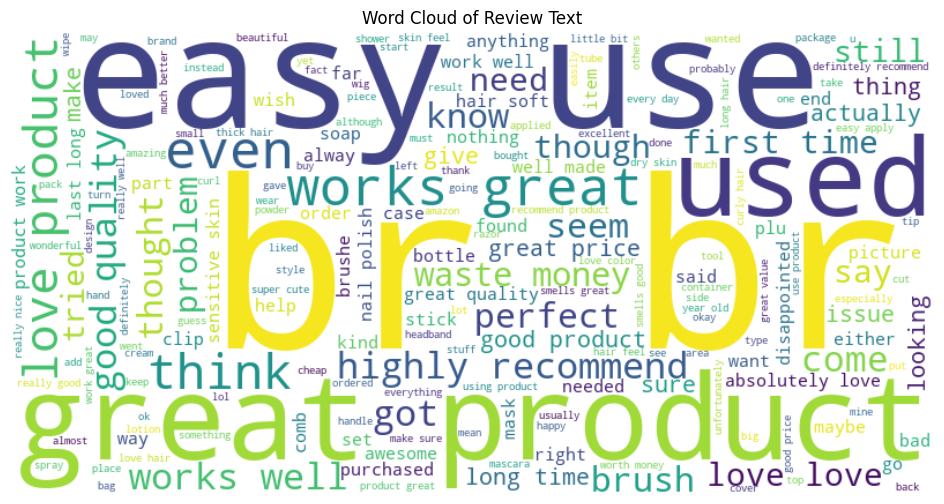

In [33]:
# 3. Visualize 'review_text'
# Text Preprocessing for Word Cloud
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        return ' '.join(filtered_tokens)
    else:
        return '' #  Return empty string for non-string values

df['processed_text'] = df['text'].apply(preprocess_text)

# Word Cloud
plt.figure(figsize=(12, 6))
text = ' '.join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.savefig('Word_Cloud_of_Review_Text', dpi=300)
plt.show()

# Analysis of basic characteristics of review texts

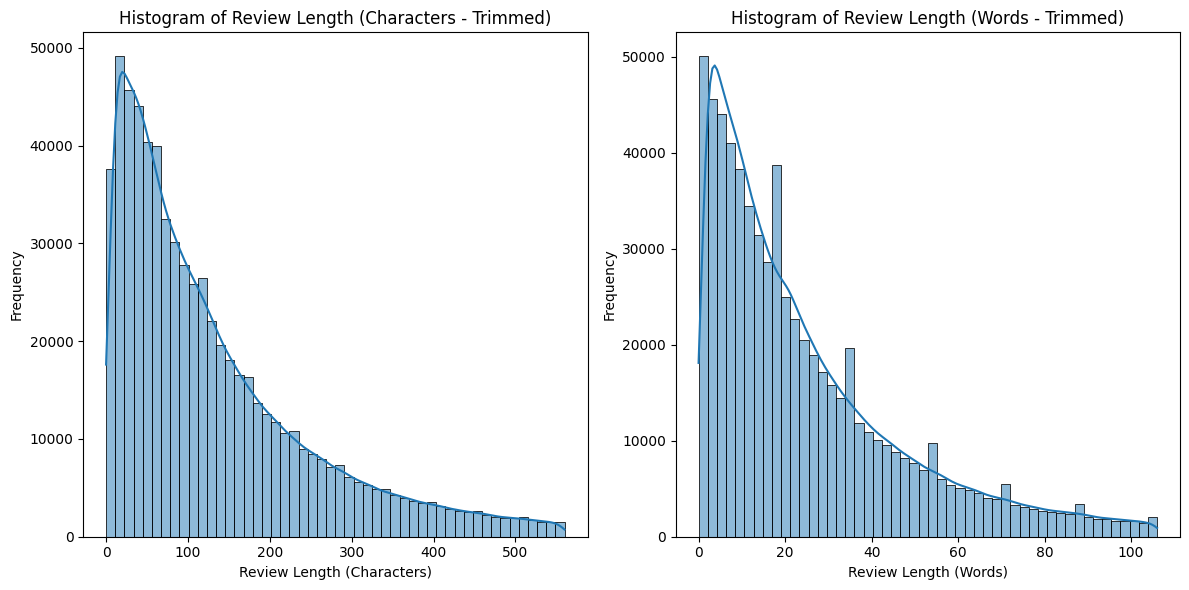


--- Summary Statistics of Review Length ---
Review Length (Characters):
|       | review_length_char   |
|:------|:---------------------|
| count | 701528               |
| mean  | 173.032              |
| std   | 246.925              |
| min   | 0                    |
| 25%   | 44                   |
| 50%   | 102                  |
| 75%   | 209                  |
| max   | 14989                |

Review Length (Words):
|       | review_length_word   |
|:------|:---------------------|
| count | 701528               |
| mean  | 32.7507              |
| std   | 45.9733              |
| min   | 0                    |
| 25%   | 8                    |
| 50%   | 19                   |
| 75%   | 40                   |
| max   | 2585                 |


In [35]:
# Calculate review length (in characters)
df['review_length_char'] = df['text'].apply(len)

# Calculate review length (in words)
df['review_length_word'] = df['text'].apply(lambda x: len(x.split()))

# --- Visualize review length (characters) trimmed ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
max_char_length = df['review_length_char'].quantile(0.95)
trimmed_df_char = df[df['review_length_char'] <= max_char_length]
sns.histplot(trimmed_df_char['review_length_char'], bins=50, kde=True)
plt.title('Histogram of Review Length (Characters - Trimmed)')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Frequency')
plt.savefig('Histogram_of_Review_Length_Characters_Trimmed.png', dpi=300)  # Save the plot

# --- Visualize review length (words) trimmed ---
plt.subplot(1, 2, 2)
max_word_length = df['review_length_word'].quantile(0.95)
trimmed_df_word = df[df['review_length_word'] <= max_word_length]
sns.histplot(trimmed_df_word['review_length_word'], bins=50, kde=True)
plt.title('Histogram of Review Length (Words - Trimmed)')
plt.xlabel('Review Length (Words)')
plt.ylabel('Frequency')
plt.savefig('Histogram_of_Review_Length_Words_Trimmed.png', dpi=300)  # Save the plot

plt.tight_layout()
plt.show()

# Summary statistics of review length
print("\n--- Summary Statistics of Review Length ---")
print("Review Length (Characters):")
print(df['review_length_char'].describe().to_markdown(numalign="left", stralign="left"))
print("\nReview Length (Words):")
print(df['review_length_word'].describe().to_markdown(numalign="left", stralign="left"))

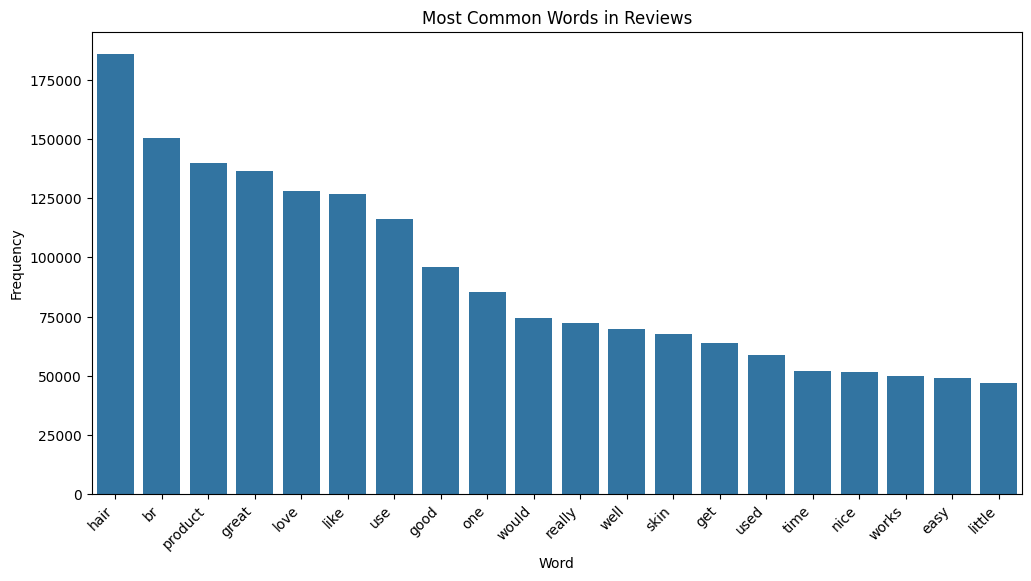


--- Most Common Words ---
[('hair', 186103), ('br', 150583), ('product', 140059), ('great', 136396), ('love', 128100), ('like', 126742), ('use', 116086), ('good', 95789), ('one', 85216), ('would', 74230), ('really', 72229), ('well', 69710), ('skin', 67581), ('get', 63984), ('used', 58695), ('time', 52177), ('nice', 51641), ('works', 50037), ('easy', 49002), ('little', 46930)]


In [36]:
from collections import Counter

# Count word frequencies
all_words = ' '.join(df['processed_text'])
word_counts = Counter(all_words.split())

# Get the most common words
most_common_words = word_counts.most_common(20)  # Top 20 words

# Visualize most common words
plt.figure(figsize=(12, 6))
words, counts = zip(*most_common_words)
sns.barplot(x=list(words), y=list(counts))
plt.title('Most Common Words in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig('Most_Common_Words_in_Reviews.png', dpi=300)
plt.show()

print("\n--- Most Common Words ---")
print(most_common_words)

#  Identify Missing Values

In [38]:
print("\n--- Missing Values Information ---")
print(df.isnull().sum())  # Count missing values per column
print("\nTotal Missing Values:", df.isnull().sum().sum())  # Count total missing values

# For numerical columns (e.g., helpful_votes), impute with 0 
if 'helpful_votes' in df.columns:
    df['helpful_vote'] = df['helpful_vote'].fillna(0) 

# For text columns (e.g., review_text), impute with an empty string
if 'review_text' in df.columns:
    df['text'] = df['text'].fillna('') 

# Verify that there are no more missing values
print("\n--- Missing Values After Handling ---")
print(df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())


--- Missing Values Information ---
rating                0
title                 0
text                  0
images                0
asin                  0
parent_asin           0
user_id               0
timestamp             0
helpful_vote          0
verified_purchase     0
processed_text        0
review_length_char    0
review_length_word    0
dtype: int64

Total Missing Values: 0

--- Missing Values After Handling ---
rating                0
title                 0
text                  0
images                0
asin                  0
parent_asin           0
user_id               0
timestamp             0
helpful_vote          0
verified_purchase     0
processed_text        0
review_length_char    0
review_length_word    0
dtype: int64

Total Missing Values: 0


# Sentiment Analysis Features

In [40]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if isinstance(text, str):
        sentiment_scores = sid.polarity_scores(text)
        return sentiment_scores
    else:
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

# Apply sentiment analysis to the 'text' column
df['sentiment_scores'] = df['processed_text'].apply(get_sentiment_scores)

# Extract individual sentiment scores into new columns
df['sentiment_neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['sentiment_neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['sentiment_pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['sentiment_compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Print some results
print("\n--- Sentiment Analysis Results ---")
print(df[['processed_text', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound']].head())


--- Sentiment Analysis Results ---
                                      processed_text  sentiment_neg  \
0  spray really nice smells really good goes real...          0.106   
1  product need wish odorless soft coconut smell ...          0.000   
2                            smells good feels great          0.000   
3                                     felt synthetic          0.000   
4                                               love          0.000   

   sentiment_neu  sentiment_pos  sentiment_compound  
0          0.593          0.301              0.7846  
1          0.615          0.385              0.8402  
2          0.222          0.778              0.7906  
3          1.000          0.000              0.0000  
4          0.000          1.000              0.6369  


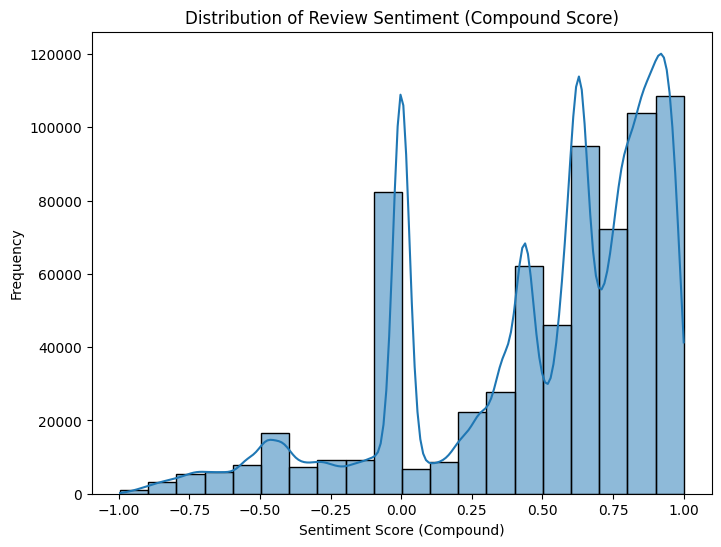

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_compound'], bins=20, kde=True)
plt.title('Distribution of Review Sentiment (Compound Score)')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.savefig('Distribution_of_Review_Sentiment.png', dpi=300)
plt.show()

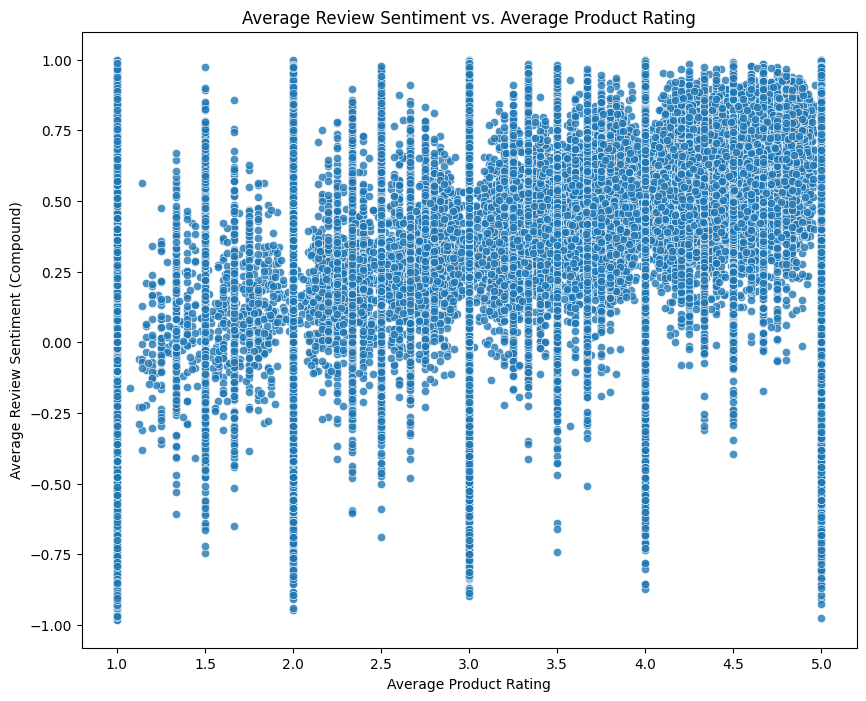


--- Examples of Average Sentiment and Rating ---
  parent_asin  avg_sentiment  avg_rating
0  0005946468       0.624900    5.000000
1  0123034892       0.440400    5.000000
2  0124784577       0.346267    4.333333
3  0515059560       0.845600    4.000000
4  0692508988       0.968200    5.000000


In [42]:
# 1. Group by 'parent_asin' and calculate the average sentiment
avg_sentiment_per_product = df.groupby('parent_asin')['sentiment_compound'].mean()

# 2. Group by 'parent_asin' and get the first rating (assuming ratings are consistent for each product)
avg_rating_per_product = df.groupby('parent_asin')['rating'].mean() 

# 3. Combine the average sentiment and average rating into a DataFrame
product_sentiment_rating = pd.DataFrame({
    'avg_sentiment': avg_sentiment_per_product,
    'avg_rating': avg_rating_per_product
}).reset_index()  # Reset index to make 'parent_asin' a column

# Visualization (Scatter Plot)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='avg_rating', y='avg_sentiment', data=product_sentiment_rating, alpha=0.8)
plt.title('Average Review Sentiment vs. Average Product Rating')
plt.xlabel('Average Product Rating')
plt.ylabel('Average Review Sentiment (Compound)')
plt.savefig('Average_Review_Sentiment_vs_Average_Product_Rating.png', dpi=300)
plt.show()

# Print some examples
print("\n--- Examples of Average Sentiment and Rating ---")
print(product_sentiment_rating.head())

# Review Length and Complexity Features

In [44]:
import textstat

# Calculate review length 
df['review_length_char'] = df['text'].apply(len)

# Calculate review length (in words) - you already have this, but included for completeness
df['review_length_word'] = df['text'].apply(lambda x: len(x.split()))

# Calculate Flesch Reading Ease score (higher score means easier to read)
df['flesch_reading_ease'] = df['text'].apply(textstat.flesch_reading_ease)

# Print some results
print("\n--- Review Length and Complexity Features ---")
print(df[['text', 'review_length_char', 'review_length_word', 'flesch_reading_ease']].head())


--- Review Length and Complexity Features ---
                                                text  review_length_char  \
0  This spray is really nice. It smells really go...                 300   
1  This product does what I need it to do, I just...                 235   
2                          Smells good, feels great!                  25   
3                                     Felt synthetic                  14   
4                                            Love it                   7   

   review_length_word  flesch_reading_ease  
0                  61                92.93  
1                  47                80.92  
2                   4               118.18  
3                   2                35.61  
4                   2               120.21  


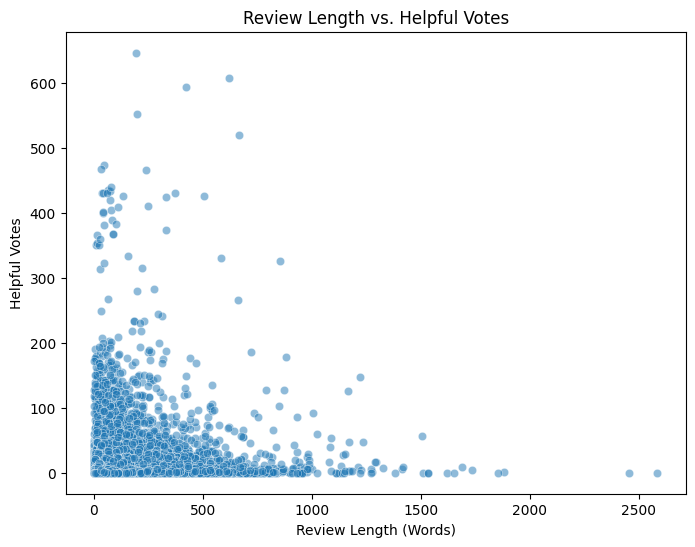

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_length_word', y='helpful_vote', data=df, alpha=0.5)
plt.title('Review Length vs. Helpful Votes')
plt.xlabel('Review Length (Words)')
plt.ylabel('Helpful Votes')
plt.savefig('Review_Length_vs_Helpful_Votes.png', dpi=300)
plt.show()

# TFIDF - numerical representations of the reviews

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features

# Fit and transform the processed text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features to the original DataFrame
df = pd.concat([df, tfidf_df], axis=1)

print("\n--- TF-IDF Representation of Reviews ---")
print(df[['processed_text'] + list(tfidf_df.columns)].head())


--- TF-IDF Representation of Reviews ---
                                      processed_text   10  100   12   15   20  \
0  spray really nice smells really good goes real...  0.0  0.0  0.0  0.0  0.0   
1  product need wish odorless soft coconut smell ...  0.0  0.0  0.0  0.0  0.0   
2                            smells good feels great  0.0  0.0  0.0  0.0  0.0   
3                                     felt synthetic  0.0  0.0  0.0  0.0  0.0   
4                                               love  0.0  0.0  0.0  0.0  0.0   

    30   34  able  absolutely  ...     would  wow  wrap  wrinkles  wrong  \
0  0.0  0.0   0.0         0.0  ...  0.000000  0.0   0.0       0.0    0.0   
1  0.0  0.0   0.0         0.0  ...  0.154033  0.0   0.0       0.0    0.0   
2  0.0  0.0   0.0         0.0  ...  0.000000  0.0   0.0       0.0    0.0   
3  0.0  0.0   0.0         0.0  ...  0.000000  0.0   0.0       0.0    0.0   
4  0.0  0.0   0.0         0.0  ...  0.000000  0.0   0.0       0.0    0.0   

   year  years

# Anomaly Detection Implementation

##  Z-scores -> The ratio between review length and rating

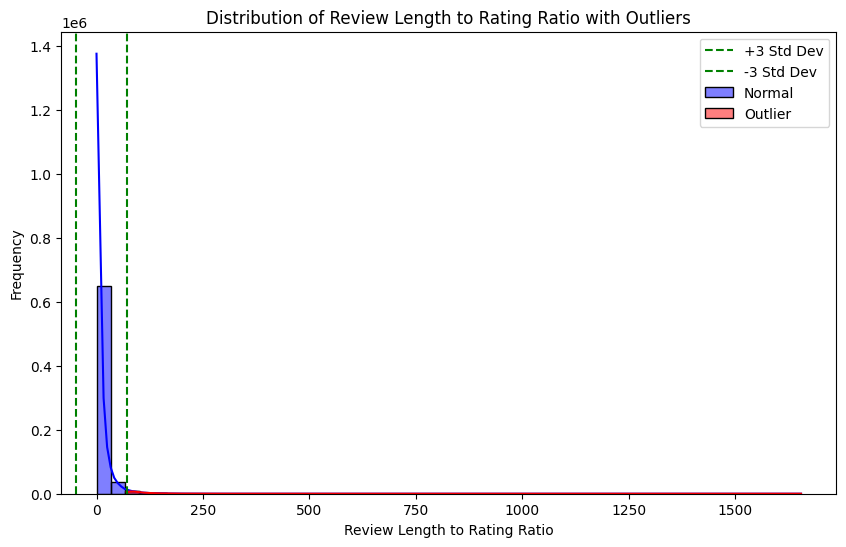

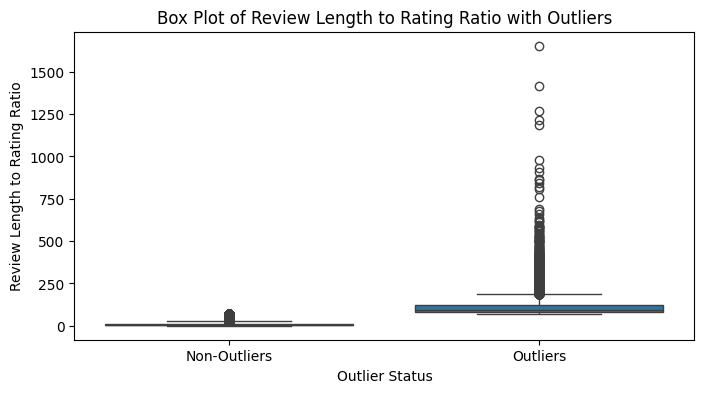


--- Review Length to Rating Ratio Outlier Counts ---
outlier_length_ratio
False    689011
True      12517
Name: count, dtype: int64

--- Outlier Review Examples ---

Review Text:
Overall, the product is okay. It glides onto the skin nicely. It feels silky smooth (thanks to the silicones in it). But, my skin doesn’t feel extra hydrated, I haven’t noticed any difference after using it for a month, let alone 7 days. I don’t like rating things based on price, but when it comes to something at this price point, I feel like it’s going to play a part in the decision, at least for me it would. And for me, the ingredients and effects resulting from this product just aren’t there to justify this price point. Honestly, even if it was way cheaper (like $20), I still wouldn’t purchase it. There’s so many great skincare products out there that are waaaaaay cheaper that I’ve actually seen results from. So, I can’t recommend this.<br /><br />I wanted to love this.....<br /><br />A serum for $171 (at 

In [97]:
import numpy as np

# 1. Calculate Review Length to Rating Ratio
try:
    df['review_length_to_rating_ratio'] = df['review_length_word'] / df['rating']
except KeyError as e:
    print(f"KeyError: {e}. Ensure 'review_length_word' and 'rating' columns exist.")
    raise  # Re-raise the exception to stop further execution

# Handle potential division by zero and NaNs
df['review_length_to_rating_ratio'] = df['review_length_to_rating_ratio'].replace([np.inf, -np.inf], 1000)  # Replace infinities with a large number
df.dropna(subset=['review_length_to_rating_ratio'], inplace=True)

# 2. Calculate Z-scores for the ratio
df['z_score_length_ratio'] = np.abs((df['review_length_to_rating_ratio'] - df['review_length_to_rating_ratio'].mean()) / df['review_length_to_rating_ratio'].std())

# 3. Identify Outliers
z_threshold = 3
df['outlier_length_ratio'] = df['z_score_length_ratio'] > z_threshold

# 4. Visualize

# Histogram visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length_to_rating_ratio'], bins=50, kde=True, color='blue', label='Normal')
sns.histplot(df[df['outlier_length_ratio'] == True]['review_length_to_rating_ratio'], bins=50, kde=True, color='red', label='Outlier')

# Add Z-score threshold lines
mean_ratio = df['review_length_to_rating_ratio'].mean()
std_ratio = df['review_length_to_rating_ratio'].std()
plt.axvline(mean_ratio + z_threshold * std_ratio, color='green', linestyle='--', label=f'+{z_threshold} Std Dev')
plt.axvline(mean_ratio - z_threshold * std_ratio, color='green', linestyle='--', label=f'-{z_threshold} Std Dev')

plt.title('Distribution of Review Length to Rating Ratio with Outliers')
plt.xlabel('Review Length to Rating Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Distribution_of_Review_Length_to_Rating_Ratio_with_Outliers.png', dpi=300)
plt.show()

# Box plot visualization (to further emphasize outliers)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['outlier_length_ratio'].map({False: 'Non-Outliers', True: 'Outliers'}), y=df['review_length_to_rating_ratio']) #Renamed labels
plt.title('Box Plot of Review Length to Rating Ratio with Outliers')
plt.xlabel('Outlier Status') # Updated x-axis label
plt.ylabel('Review Length to Rating Ratio')
plt.savefig('Box_Plot_of_Review_Length_to_Rating_Ratio_with_Outliers.png', dpi=300)
plt.show()

# Print outlier counts
print("\n--- Review Length to Rating Ratio Outlier Counts ---")
print(df['outlier_length_ratio'].value_counts())

# --- Display Outlier Review Examples ---
outlier_reviews = df[df['outlier_length_ratio'] == True].sort_values(by='z_score_length_ratio', ascending=False)
 

print("\n--- Outlier Review Examples ---")
for index, row in outlier_reviews.head(10).iterrows(): # Show top 10 outliers
    print(f"\nReview Text:\n{row['text']}\n")
    print(f"Rating: {row['rating']}")
    print(f"Review Length (Words): {row['review_length_word']}")
    print(f"Z-Score: {row['z_score_length_ratio']:.2f}")
    print(f"Length-to-Rating Ratio: {row['review_length_to_rating_ratio']:.2f}")
    print("-" * 50)

### Sensitivity analysis

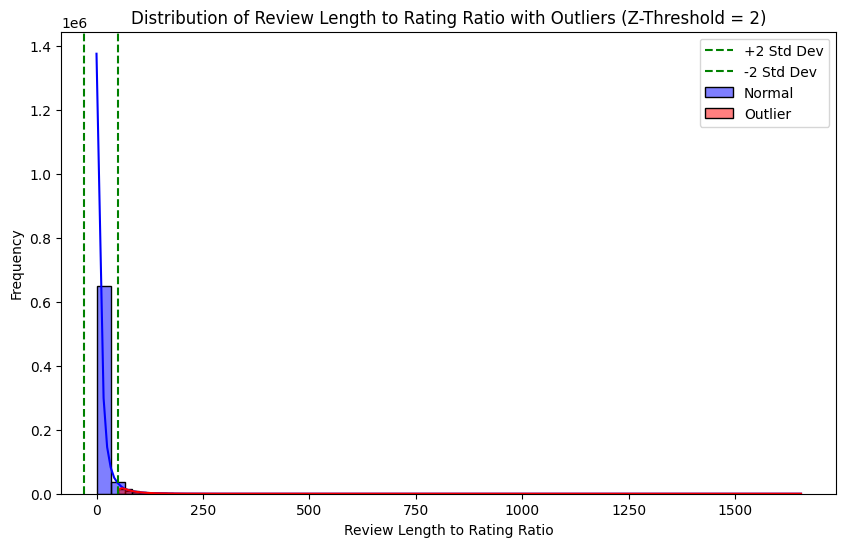

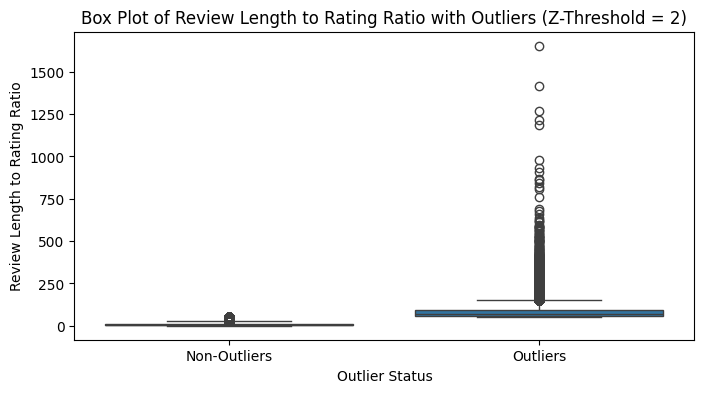


--- Review Length to Rating Ratio Outlier Counts (Z-Threshold = 2) ---
outlier_length_ratio_z_2
False    677210
True      24318
Name: count, dtype: int64

--- Outlier Review Examples (Z-Threshold = 2) ---

Review Text:
Overall, the product is okay. It glides onto the skin nicely. It feels silky smooth (thanks to the silicones in it). But, my skin doesn’t feel extra hydrated, I haven’t noticed any difference after using it for a month, let alone 7 days. I don’t like rating things based on price, but when it comes to something at this price point, I feel like it’s going to play a part in the decision, at least for me it would. And for me, the ingredients and effects resulting from this product just aren’t there to justify this price point. Honestly, even if it was way cheaper (like $20), I still wouldn’t purchase it. There’s so many great skincare products out there that are waaaaaay cheaper that I’ve actually seen results from. So, I can’t recommend this.<br /><br />I wanted to love th

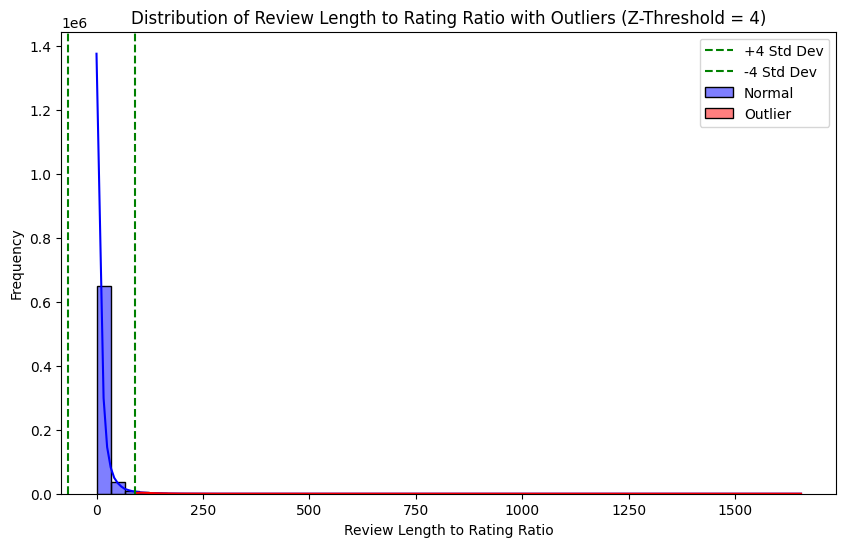

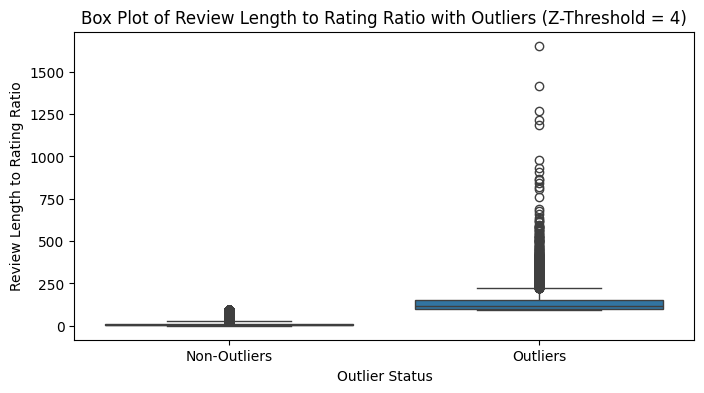


--- Review Length to Rating Ratio Outlier Counts (Z-Threshold = 4) ---
outlier_length_ratio_z_4
False    694614
True       6914
Name: count, dtype: int64

--- Outlier Review Examples (Z-Threshold = 4) ---

Review Text:
Overall, the product is okay. It glides onto the skin nicely. It feels silky smooth (thanks to the silicones in it). But, my skin doesn’t feel extra hydrated, I haven’t noticed any difference after using it for a month, let alone 7 days. I don’t like rating things based on price, but when it comes to something at this price point, I feel like it’s going to play a part in the decision, at least for me it would. And for me, the ingredients and effects resulting from this product just aren’t there to justify this price point. Honestly, even if it was way cheaper (like $20), I still wouldn’t purchase it. There’s so many great skincare products out there that are waaaaaay cheaper that I’ve actually seen results from. So, I can’t recommend this.<br /><br />I wanted to love th

In [109]:
# Function to perform outlier detection and visualization
def analyze_outliers(df, z_threshold):
    """
    Performs outlier analysis using Z-score and visualizes the results.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    z_threshold (float): The Z-score threshold for outlier detection.
    """
    # Identify Outliers
    df[f'outlier_length_ratio_z_{z_threshold}'] = df['z_score_length_ratio'] > z_threshold

    # Visualize

    # Histogram visualization
    plt.figure(figsize=(10, 6))
    sns.histplot(df['review_length_to_rating_ratio'], bins=50, kde=True, color='blue', label='Normal')
    sns.histplot(df[df[f'outlier_length_ratio_z_{z_threshold}'] == True]['review_length_to_rating_ratio'], bins=50, kde=True, color='red', label='Outlier')

    # Add Z-score threshold lines
    mean_ratio = df['review_length_to_rating_ratio'].mean()
    std_ratio = df['review_length_to_rating_ratio'].std()
    plt.axvline(mean_ratio + z_threshold * std_ratio, color='green', linestyle='--', label=f'+{z_threshold} Std Dev')
    plt.axvline(mean_ratio - z_threshold * std_ratio, color='green', linestyle='--', label=f'-{z_threshold} Std Dev')

    plt.title(f'Distribution of Review Length to Rating Ratio with Outliers (Z-Threshold = {z_threshold})')
    plt.xlabel('Review Length to Rating Ratio')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Box plot visualization (to further emphasize outliers)
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[f'outlier_length_ratio_z_{z_threshold}'].map({False: 'Non-Outliers', True: 'Outliers'}), y=df['review_length_to_rating_ratio'])  # Renamed labels
    plt.title(f'Box Plot of Review Length to Rating Ratio with Outliers (Z-Threshold = {z_threshold})')
    plt.xlabel('Outlier Status')  # Updated x-axis label
    plt.ylabel('Review Length to Rating Ratio')
    plt.show()

    # Print outlier counts
    print(f"\n--- Review Length to Rating Ratio Outlier Counts (Z-Threshold = {z_threshold}) ---")
    print(df[f'outlier_length_ratio_z_{z_threshold}'].value_counts())

    # --- Display Outlier Review Examples ---
    outlier_reviews = df[df[f'outlier_length_ratio_z_{z_threshold}'] == True].sort_values(by='z_score_length_ratio', ascending=False)

    print(f"\n--- Outlier Review Examples (Z-Threshold = {z_threshold}) ---")
    for index, row in outlier_reviews.head(10).iterrows():  # Show top 10 outliers
        print(f"\nReview Text:\n{row['text']}\n")
        print(f"Rating: {row['rating']}")
        print(f"Review Length (Words): {row['review_length_word']}")
        print(f"Z-Score: {row['z_score_length_ratio']:.2f}")
        print(f"Length-to-Rating Ratio: {row['review_length_to_rating_ratio']:.2f}")
        print("-" * 50)

# Perform sensitivity analysis by varying the z_threshold
z_thresholds = [2, 4]  # Test with Z-score thresholds of 2 and 4
for z_threshold in z_thresholds:
    analyze_outliers(df.copy(), z_threshold)  # Create a copy to avoid modifying the original DataFrame

##  Z-scores -> Unusual patterns in helpful votes

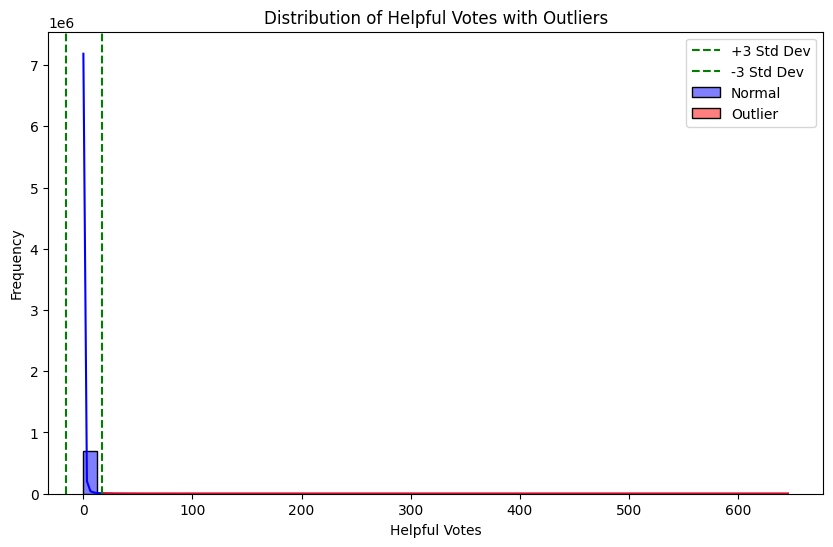

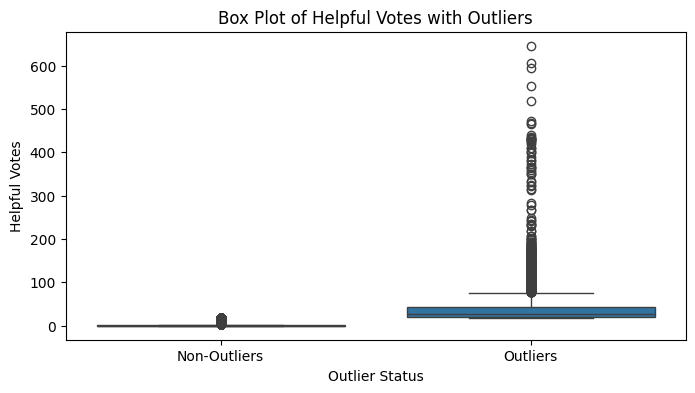


--- Helpful Votes Outlier Counts ---
outlier_helpful_votes
False    696796
True       4732
Name: count, dtype: int64

--- Helpful Vote Outlier Review Examples ---

Review Text:
I love this product!!! I have PCOS, acne, psoriasis, hyper pigmentation, and a ton of dark marks. I’m a dark complexion African American woman, and I’ve visited dermatologists who have given me many products to clear up my face. It was even suggested for me to use bleaching cream, but I do not want to get lighter, so I have refused to use it. I love my dark chocolate skin, but I do want the skin on my face to be even. This product is a miracle!!! My pores are almost non existent. If I have an outbreak of acne, it takes it away almost overnight. The scaling caused by the psoriasis on my face is gone. My face feels SO smooth!!! Also, my face is brighter!!! My tone is almost evened out!!! I used to wear make up to cover up my flaws, and now, I don’t need it. I just put on lashes, liner, and lipstick, then dip ✌🏿. 

In [102]:
 # 1. Calculate Z-scores for 'helpful_vote'
 df['z_score_helpful_votes'] = np.abs((df['helpful_vote'] - df['helpful_vote'].mean()) / df['helpful_vote'].std())
 

 # 2. Identify Outliers
 z_threshold = 3
 df['outlier_helpful_votes'] = df['z_score_helpful_votes'] > z_threshold
 

 # 3. Visualize
 

 # Histogram visualization
 plt.figure(figsize=(10, 6))
 sns.histplot(df['helpful_vote'], bins=50, kde=True, color='blue', label='Normal')
 sns.histplot(df[df['outlier_helpful_votes'] == True]['helpful_vote'], bins=50, kde=True, color='red', label='Outlier')
 

 # Add Z-score threshold lines
 mean_helpful_votes = df['helpful_vote'].mean()
 std_helpful_votes = df['helpful_vote'].std()
 plt.axvline(mean_helpful_votes + z_threshold * std_helpful_votes, color='green', linestyle='--', label=f'+{z_threshold} Std Dev')
 plt.axvline(mean_helpful_votes - z_threshold * std_helpful_votes, color='green', linestyle='--', label=f'-{z_threshold} Std Dev')
 

 plt.title('Distribution of Helpful Votes with Outliers')
 plt.xlabel('Helpful Votes')
 plt.ylabel('Frequency')
 plt.legend()
 plt.savefig('Distribution_of_Helpful_Votes_with_Outliers.png', dpi=300)
 plt.show()
 

 # Box plot visualization
 plt.figure(figsize=(8, 4))
 sns.boxplot(x=df['outlier_helpful_votes'].map({False: 'Non-Outliers', True: 'Outliers'}), y=df['helpful_vote']) # relabel
 plt.title('Box Plot of Helpful Votes with Outliers')
 plt.xlabel('Outlier Status') # More descriptive label
 plt.ylabel('Helpful Votes')
 plt.savefig('Box_Plot_of_Helpful_Votes_with_Outliers.png', dpi=300)
 plt.show()
 

 # Print outlier counts
 print("\n--- Helpful Votes Outlier Counts ---")
 print(df['outlier_helpful_votes'].value_counts())

 # --- Display Outlier Review Examples ---
 outlier_helpful_votes_reviews = df[df['outlier_helpful_votes'] == True].sort_values(by='z_score_helpful_votes', ascending=False)
 

 print("\n--- Helpful Vote Outlier Review Examples ---")
 for index, row in outlier_helpful_votes_reviews.head(5).iterrows(): # Show top 5 outliers
  print(f"\nReview Text:\n{row['text']}\n")
  print(f"Helpful Votes: {row['helpful_vote']}")
  print(f"Z-Score (Helpful Votes): {row['z_score_helpful_votes']:.2f}")
  print("-" * 50)

## Anomaly Detection Implementation -> Machine Learning Method

In [86]:
 from sklearn.ensemble import IsolationForest
 from sklearn.preprocessing import StandardScaler

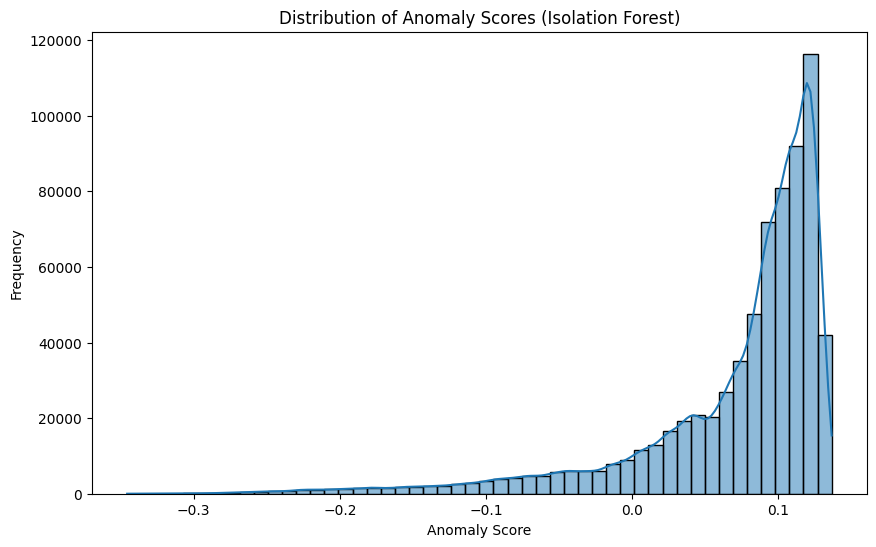


--- Anomalous Reviews Examples ---
Review Text: I was very disappointed when I got this facial scrub. I had assumed it was like other scrubs I use but it wasn't. This is a powder which you need to mix with water to make a paste before you put it on your face. I have a tendency to like to use scrubs in the shower with me, so this extra step doesn't really work for me. As far as the scrubbing factor goes, it's ok. I didn't feel a real smoothing or softening of my skin after use the way I have with others. The biggest plus is the fragrance (i love the smell of oranges). I won't be repurchasing.
Anomaly Score: -0.0022739388416961326
---
Review Text: I try to get Keratin treatments every 3 months, but honestly it has been getting costly. So, when I saw this I was excited to try it. I found it difficult to use and almost impossible to get to saturate the back of my hair and straight iron it the way they do in the salon. Front and sides were ok, but I couldn't maneuver the back to get it str

In [90]:
 # --- Data Preparation ---
 features = ['review_length_char', 'helpful_vote', 'sentiment_compound', 'review_length_word']
 

 # Handle missing values (if any) - important for Isolation Forest
 df[features] = df[features].fillna(0)  #Impute missing values with 0 or another suitable value
 

 X = df[features]
 

 # Scale the features (important for Isolation Forest to perform well)
 scaler = StandardScaler()
 X_scaled = scaler.fit_transform(X)
 

 # --- Isolation Forest Model ---
 # Train the Isolation Forest model
 model = IsolationForest(n_estimators=100, contamination='auto', random_state=42) # You can tune hyperparameters
 model.fit(X_scaled)
 

 # Predict anomalies
 df['anomaly_score'] = model.decision_function(X_scaled)
 df['is_anomaly'] = model.predict(X_scaled)  # Returns 1 for inliers, -1 for outliers
 

 # --- Visualization ---
 # Visualize anomaly scores
 plt.figure(figsize=(10, 6))
 sns.histplot(df['anomaly_score'], bins=50, kde=True)
 plt.title('Distribution of Anomaly Scores (Isolation Forest)')
 plt.xlabel('Anomaly Score')
 plt.ylabel('Frequency')
 plt.savefig('Distribution_of_Anomaly_Scores.png', dpi=300)
 plt.show()
 

 # --- Anomaly Examples ---
 # Get the anomalous reviews
 anomalous_reviews = df[df['is_anomaly'] == -1]
 

 print("\n--- Anomalous Reviews Examples ---")
 for index, row in anomalous_reviews.head(10).iterrows():
  print(f"Review Text: {row['text']}\nAnomaly Score: {row['anomaly_score']}\n---")

### Sensitivity analysis

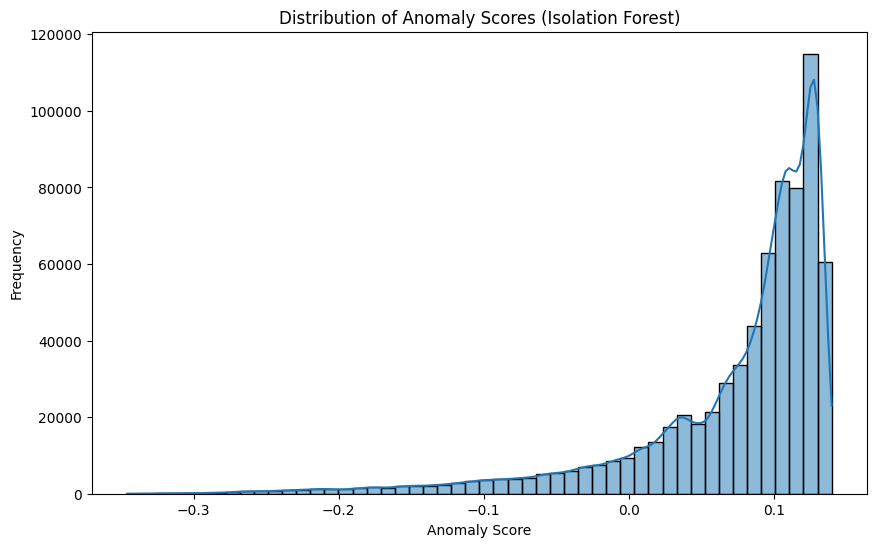


--- Anomalous Reviews Examples ---
Review Text: I was very disappointed when I got this facial scrub. I had assumed it was like other scrubs I use but it wasn't. This is a powder which you need to mix with water to make a paste before you put it on your face. I have a tendency to like to use scrubs in the shower with me, so this extra step doesn't really work for me. As far as the scrubbing factor goes, it's ok. I didn't feel a real smoothing or softening of my skin after use the way I have with others. The biggest plus is the fragrance (i love the smell of oranges). I won't be repurchasing.
Anomaly Score: -0.009171438180816893
---
Review Text: I try to get Keratin treatments every 3 months, but honestly it has been getting costly. So, when I saw this I was excited to try it. I found it difficult to use and almost impossible to get to saturate the back of my hair and straight iron it the way they do in the salon. Front and sides were ok, but I couldn't maneuver the back to get it stra

In [117]:
 # --- Data Preparation ---
 # Choose the features you want to use for anomaly detection
 # For example, let's use review length, helpful votes, and sentiment.
 features = ['review_length_char', 'helpful_vote', 'sentiment_compound', 'review_length_word']
 

 # Handle missing values (if any) - important for Isolation Forest
 df[features] = df[features].fillna(0)  #Impute missing values with 0 or another suitable value
 

 X = df[features]
 

 # Scale the features (important for Isolation Forest to perform well)
 scaler = StandardScaler()
 X_scaled = scaler.fit_transform(X)
 

 # --- Isolation Forest Model ---
 # Train the Isolation Forest model
 model = IsolationForest(n_estimators=200, contamination='auto', random_state=42) # increase n_estimators
 model.fit(X_scaled)
 

 # Predict anomalies
 df['anomaly_score'] = model.decision_function(X_scaled)
 df['is_anomaly'] = model.predict(X_scaled)  # Returns 1 for inliers, -1 for outliers
 

 # --- Visualization ---
 # Visualize anomaly scores
 plt.figure(figsize=(10, 6))
 sns.histplot(df['anomaly_score'], bins=50, kde=True)
 plt.title('Distribution of Anomaly Scores (Isolation Forest)')
 plt.xlabel('Anomaly Score')
 plt.ylabel('Frequency')
 plt.savefig('Distribution_of_Anomaly_Scores_modified.png', dpi=300)
 plt.show()
 

 # --- Anomaly Examples ---
 # Get the anomalous reviews
 anomalous_reviews = df[df['is_anomaly'] == -1]
 

 print("\n--- Anomalous Reviews Examples ---")
 for index, row in anomalous_reviews.head(10).iterrows():
  print(f"Review Text: {row['text']}\nAnomaly Score: {row['anomaly_score']}\n---")